In [22]:
from modelo_tweets import *

In [23]:
partidos=pd.read_csv('entradas/Partidos.csv')
manifestaciones=pd.read_csv('entradas/Manifestaciones.csv')
f_especiales=pd.read_csv('entradas/FechasEspeciales.csv')
masas=pd.read_csv('entradas/masas.csv')
masas.fecha=pd.to_datetime(masas.fecha)

partidos_M=pd.to_datetime(partidos['Fecha'].dropna())
partidos_S=pd.to_datetime(partidos['Fecha.1'].dropna())
manifestaciones=pd.to_datetime(manifestaciones['Fecha'].dropna())
f_especiales=pd.to_datetime(f_especiales[['2019','2020']].values.flatten())
f_especiales=f_especiales[~f_especiales.isna()]

def TC(t):
    return np.array([        
                     t.weekday()/6.0,
                     (t.hour > 12)*1,
                     (pd.Timestamp(t.date()) == partidos_M).sum(),
                     (pd.Timestamp(t.date()) == partidos_S).sum(),
                     (pd.Timestamp(t.date()) == manifestaciones).sum(),
                     (pd.Timestamp(t.date()) == f_especiales).sum(),   
#                      np.nan_to_num(masas[masas.fecha == pd.Timestamp(t.date())].CreatedAt.mean()),
                     1
                    ])

In [24]:
with open('entradas/data_tweets.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [25]:
train_period=('2019-09-24 00:00', '2019-11-24 00:00')
validate_period=('2019-11-24 00:00', '2019-12-01 00:00')
model=modelTweets(data,
                  train_period,
                  validate_period,
                  f_covariates=(TC,restore_date),
                  followers_rate=3,
                  win_size_pred_period=1
                 )

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

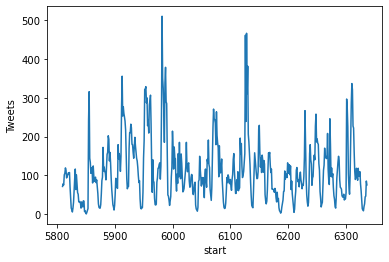

In [20]:
sns.lineplot(model.real_tweets_train.start,model.real_tweets_train.Tweets)

<BarContainer object of 4 artists>

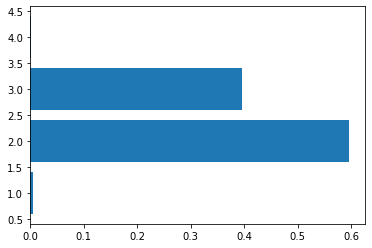

In [6]:
V,C=np.unique([model.Tweets[i]['sentiment'] for i in model.Tweets],return_counts=True)
C=C/C.sum()
plt.barh(V,C)

In [26]:
model.compute_Beta()

1118.9662519144113
[ 61.  61.  16.  24.   6.   6. 122.]
1118.9662519144113


array([ -0.02019725,  -0.64517312,  -0.23237478,   0.11400648,
         1.503511  , -10.27599759,   2.9708072 ])

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

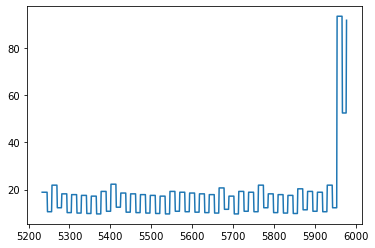

In [101]:
sns.lineplot(model.t_train,back_ground(model.Beta,model.t_train,model.f_covariates))

<AxesSubplot:>

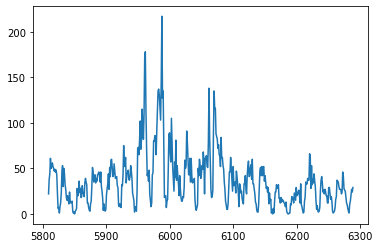

In [9]:
T_O=count_tweets([model.Tweets[i]['times'][0] for i in model.keys_train],model.t_train)
sns.lineplot(x=model.t_train[:-1],y=T_O)

In [48]:
P_L,P_V=get_particion(model.train_start,model.train_end,model.f_covariates)

In [49]:
pd.DataFrame([[i]+list(model.f_covariates(i)[[0,1]]) for i in P_V],columns=['time','Santa fe','fechas especiales'])

,time,Santa fe,fechas especiales
0,5815.732374,0.666667,0.0
1,5827.749064,0.666667,1.0
2,5839.765753,0.833333,0.0
3,5851.782443,0.833333,1.0
4,5863.799133,1.000000,0.0
5,5875.815823,1.000000,1.0
6,5887.832513,0.000000,0.0
7,5899.849203,0.000000,1.0
8,5911.865892,0.166667,0.0
9,5923.882582,0.166667,1.0


In [27]:
model.infectious_rate_fit()

(array([-6.19890636e-07, -7.80474220e-02,  1.17405249e+00]),
 <function modelo_tweets.get_infectious_rate_fitted.<locals>.<lambda>(t, t0, p0, s)>,
 0.021102186068560062)

In [165]:
model.p_est

{'1122275839884894209': [array([0.00339933, 0.00287832, 0.00129272, 0.00094891, 0.00395136,
         0.00342448, 0.00216408, 0.00235306, 0.00275782, 0.00112304,
         0.        , 0.00173454, 0.00345438, 0.00095537, 0.        ,
         0.        , 0.00103352, 0.00159412, 0.        , 0.        ,
         0.00165226, 0.        , 0.00193181, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.00284975, 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [14]:
tweet=model.Tweets['1122275839884894209']
event_times=tweet['times']
t0=event_times[0]
S=tweet['sentiment']
followers=sigmoid_foll(tweet['followers'],3)
mask= event_times <= model.train_end
tweet

{'sentiment': 2,
 'times': array([ 969.33027778,  969.33972222,  969.35055556,  969.37638889,
         969.40611111,  969.49694444,  969.49694444,  969.51277778,
         969.55694444,  969.57555556,  969.59194444,  969.60027778,
         969.60111111,  969.61666667,  969.65583333,  969.69722222,
         969.71055556,  969.73277778,  969.73833333,  969.74055556,
         969.74138889,  969.75361111,  969.75583333,  969.79166667,
         969.79555556,  969.79805556,  969.83833333,  969.89222222,
         969.89722222,  969.90694444,  969.92527778,  969.94611111,
         969.95277778,  969.95805556,  969.97888889,  969.99972222,
         970.01805556,  970.12527778,  970.12722222,  970.12861111,
         970.13388889,  970.13583333,  970.22694444,  970.23333333,
         970.26027778,  970.26638889,  970.27      ,  970.37916667,
         970.38111111,  970.39805556,  970.40805556,  970.41138889,
         970.41972222,  970.43111111,  970.48083333,  970.49583333,
         970.49861111,

<AxesSubplot:>

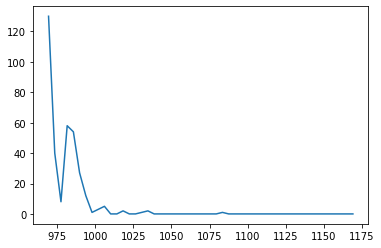

In [15]:
num_=int((model.train_end-t0)/4)
time_x=np.linspace(t0, model.train_end,num=num_)
sns.lineplot(x=time_x[:50],y=count_tweets(event_times,time_x)[:50])

In [16]:
p_i_est,t_points=estimate_infectious_rate_vec(event_times[mask], followers[mask], integral_zhao, model.train_end,4)

In [17]:
p_i_est

array([0.00334227, 0.00215852, 0.00162321, 0.00380183, 0.00274928,
       0.00246178, 0.00254369, 0.00040071, 0.00188481, 0.00267038,
       0.        , 0.        , 0.00160544, 0.        , 0.        ,
       0.00134208, 0.00170401, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00211774])

In [18]:
t_points

array([ 969.33027778,  973.40617254,  977.48206731,  981.55796207,
        985.63385684,  989.7097516 ,  993.78564637,  997.86154113,
       1001.9374359 , 1006.01333066, 1010.08922543, 1014.16512019,
       1018.24101496, 1022.31690972, 1026.39280449, 1030.46869925,
       1034.54459402, 1038.62048878, 1042.69638355, 1046.77227831,
       1050.84817308, 1054.92406784, 1058.99996261, 1063.07585737,
       1067.15175214, 1071.2276469 , 1075.30354167, 1079.37943643,
       1083.4553312 ])

<AxesSubplot:>

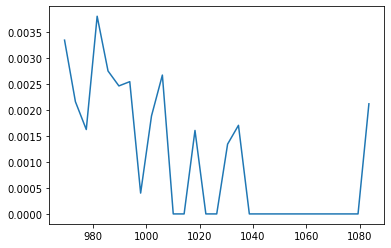

In [19]:
sns.lineplot(x=t_points,y=p_i_est)

<AxesSubplot:>

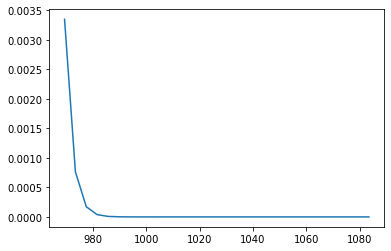

In [20]:
sns.lineplot(x=t_points,y=infectious_rate_tweets_vec(t_points,1.54420386e-02, -9.21879903e+01,  2.74548977e+00,24,t0,p_i_est[0],(5-S)/5))

In [28]:
LT,TT=model.compute_lambda_train()

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:404: RuntimeWarning: overflow encountered in exp
  R= p0*(1-(S*r0)*np.sin(2*np.pi/tm*(t+phi0)))*np.exp(-(t-t0)/taum)
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:404: RuntimeWarning: invalid value encountered in multiply
  R= p0*(1-(S*r0)*np.sin(2*np.pi/tm*(t+phi0)))*np.exp(-(t-t0)/taum)
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:404: RuntimeWarning: overflow encountered in multiply
  R= p0*(1-(S*r0)*np.sin(2*np.pi/tm*(t+phi0)))*np.exp(-(t-t0)/taum)


In [29]:
max(LT)

442.35051272048565

In [298]:
TT

,start,end,Tweets
0,5809.223333,5810.224724,32.321083
1,5810.224724,5811.226115,47.494546
2,5811.226115,5812.227506,67.694391
3,5812.227506,5813.228897,75.866242
4,5813.228897,5814.230287,112.889040
...,...,...,...
714,6524.216379,6525.217770,16.347391
715,6525.217770,6526.219161,19.640400
716,6526.219161,6527.220552,16.163321
717,6527.220552,6528.221943,25.877065


/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

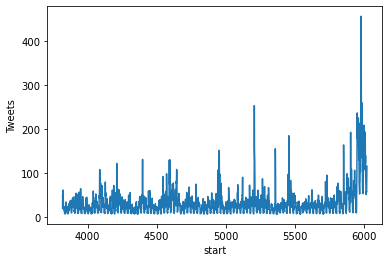

In [13]:
sns.lineplot(TT.start,TT.Tweets)

In [30]:
LP, TP = model.compute_lambda_predict()

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start'>

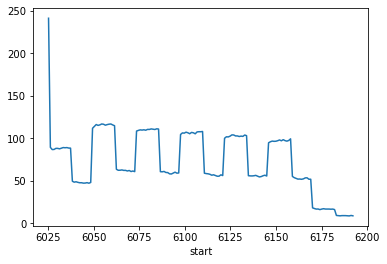

In [15]:
sns.lineplot(model.real_tweets_validate.start,LP[:-1])

In [16]:
len(model.real_tweets_validate.start)

167

<AxesSubplot:>

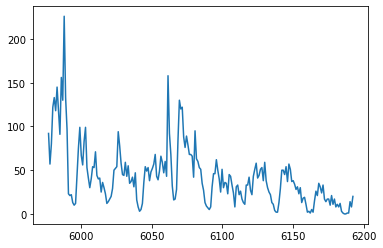

In [186]:
T_O=count_tweets([model.Tweets[i]['times'][0] for i in model.keys_validation],model.t_pred)
sns.lineplot(x=model.t_pred[:-1],y=T_O)

/u01/user8/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='start', ylabel='Tweets'>

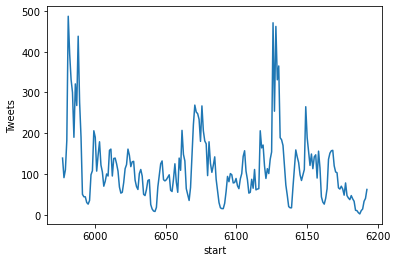

In [114]:
sns.lineplot(model.real_tweets_validate.start,model.real_tweets_validate.Tweets)

In [47]:
dates=[restore_date(i,model.f_inicio) for i in model.real_tweets_validate.start[3:]]
A=manifestaciones[(manifestaciones>= restore_date(model.validate_start,model.f_inicio)) & (manifestaciones<= restore_date(model.validate_end,model.f_inicio))].values
B=partidos_S[(partidos_S>= restore_date(model.validate_start,model.f_inicio)) & (partidos_S<= restore_date(model.validate_end,model.f_inicio))].values
C=partidos_M[(partidos_M>= restore_date(model.validate_start,model.f_inicio)) & (partidos_M<= restore_date(model.validate_end,model.f_inicio))].values
D=f_especiales[(f_especiales>= restore_date(model.validate_start,model.f_inicio)) & (f_especiales<= restore_date(model.validate_end,model.f_inicio))].values

In [32]:
T_O=count_tweets([model.Tweets[i]['times'][0] for i in model.keys_validation],model.t_pred)

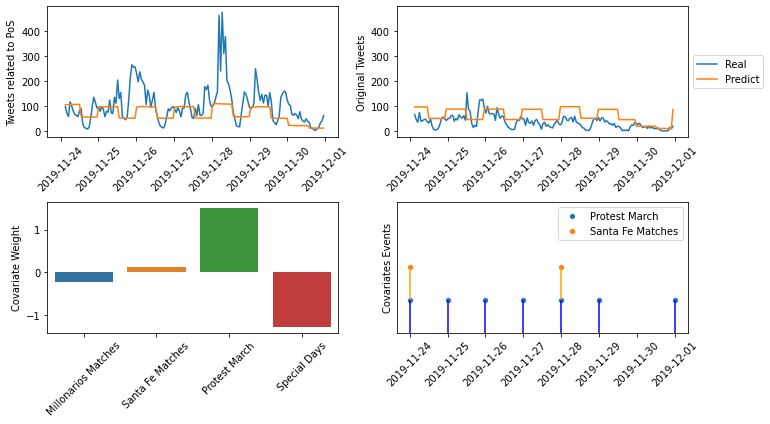

In [54]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(2, 2, 1)
sns.lineplot(x=dates,y=model.real_tweets_validate.Tweets[3:],ax=ax1)
sns.lineplot(x=dates,y=TP.Tweets[3:],ax=ax1)
ax1.legend(['Real','Predict'],loc='center left',bbox_to_anchor=(2.2, 0.5))
ax1.tick_params('x',labelrotation=45)
ax1.set_ylabel('Tweets related to PoS')
#########
ax2 = fig.add_subplot(2, 2, 2, sharex = ax1,sharey=ax1)
ax2.set_ylabel('Original Tweets')
sns.lineplot(x=dates,y=T_O[3:],ax=ax2)
sns.lineplot(x=dates,y=back_ground(model.Beta,model.t_pred[4:],model.f_covariates),ax=ax2)
ax2.tick_params('x',labelrotation=45)
#########
ax3 = fig.add_subplot(2, 2, 3)
sns.barplot(x=['Millonarios Matches','Santa Fe Matches','Protest March','Special Days'],y=Beta__[:-1],ax=ax3)
ax3.set_ylabel('Covariate Weight')
ax3.tick_params('x',labelrotation=45)
#########
ax4 = fig.add_subplot(2, 2, 4, sharex = ax1)
ax4.set_ylim([0, 1])
ax4.set_ylabel('Covariates Events')
sns.lineplot(x=A,y=0.25*np.ones(len(A)),ax=ax4,marker='o', linestyle='',palette=['blue'])   
sns.lineplot(x=B,y=0.5*np.ones(len(B)),ax=ax4,marker='o', linestyle='',palette=['orange'])    
sns.lineplot(x=C,y=0.75*np.ones(len(C)),ax=ax4,marker='o', linestyle='',palette=['orange'])    
ax4.legend(['Protest March','Santa Fe Matches'],loc=1)
for i in B:
    ax4.axvline(i,ymin=0.26,ymax=0.49,color='orange')  
for i in A:
    ax4.axvline(i,ymax=0.24,color='blue')   

ax4.set_yticks([])
ax4.tick_params('x',labelrotation=45)

fig.tight_layout() 
# plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig('results/figures/main_.pdf',bbox_inches='tight')

In [37]:
Beta__=model.Beta[2:]

In [39]:
Beta__[3]=-1.27599

In [21]:
model.compute_errors()

({'APE': array([0.97670896, 0.06977177, 0.34806662, 0.11392023, 0.24072535,
         0.51890293, 0.25157246, 0.12615779, 0.11312819, 0.3458871 ,
         0.41309813, 0.55223912, 0.09095634, 0.45069562, 0.66726719,
         2.48713925, 3.37648699, 4.9584281 , 2.40616947, 0.0920482 ,
         0.51736305, 0.64613196, 0.58667609, 0.47823017, 0.15213776,
         0.44306091, 0.19724116, 0.32334967, 1.03073039, 0.47846581,
         0.55285187, 0.0695355 , 0.61204394, 0.66501357, 0.13505067,
         0.04205841, 0.43757527, 0.51134967, 0.59513008, 0.0574089 ,
         0.2303276 , 0.38225933, 0.15262932, 0.4958238 , 0.70856595,
         0.77029543, 0.7598747 , 0.76358415, 0.52850255, 0.44537819,
         0.53646321, 0.47305375, 0.43897471, 0.40187122, 0.04162894,
         0.32702073, 0.21839815, 0.17704968, 0.11047501, 0.28315766,
         0.28868802, 0.01143298, 0.78054883, 2.20882963, 2.98239246,
         3.96843371, 1.15361792, 0.01701229, 0.33622019, 0.25797139,
         0.36613054, 0.3897

In [305]:
pd.DataFrame(model.errors_predict).drop(['APE'],axis=1)

,MAPE,MSE,MAE,RMSE,Pearson,kendall
0,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
1,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
2,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
3,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
4,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
...,...,...,...,...,...,...
402,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
403,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
404,inf,5710.760913,28.054924,75.569577,0.137015,0.290136
405,inf,5710.760913,28.054924,75.569577,0.137015,0.290136


In [306]:
with open('errors_covariados_blocking2.pickle', 'rb') as f:
    x = pickle.load(f)

In [307]:
x[(train_period, validate_period)][0][(0,1,2,3, 4, 5)]

KeyError: (0, 1, 2, 3, 4, 5)

In [309]:
x[(train_period, validate_period)][0][(0, 1,2,3, 4, 5)]=model.errors_predict

In [310]:
with open('errors_covariados_blocking2.pickle', 'wb') as handle:
        pickle.dump(x, handle, protocol=pickle.HIGHEST_PROTOCOL)

[Text(0.5, 0, 'Time (Hours)'), Text(0, 0.5, 'APE')]

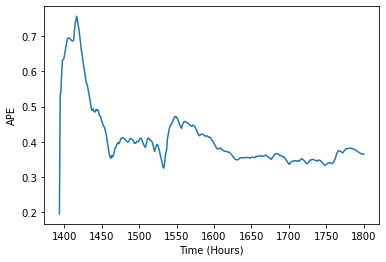

In [32]:
len(model.errors_predict_cum['APE']),len(model.t_pred)
ax=sns.lineplot(x=model.t_pred[:-1],y=model.errors_predict_cum['APE'])
ax.set(xlabel='Time (Hours)',ylabel='APE')

In [33]:
model.poisson_method()

,start,end,Tweets
0,1393.223333,1394.225790,22.195264
1,1394.225790,1395.228247,22.195264
2,1395.228247,1396.230704,22.195264
3,1396.230704,1397.233161,22.195264
4,1397.233161,1398.235618,22.195264
...,...,...,...
402,1796.211048,1797.213505,8.241183
403,1797.213505,1798.215962,8.241183
404,1798.215962,1799.218419,8.241183
405,1799.218419,1800.220876,8.241183


In [34]:
A,B = model.compute_errors(model.poisson_predictions)

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:894: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real


In [35]:
pd.DataFrame(A).drop(['APE'],axis=1)

,MAPE,MSE,MAE,RMSE,Pearson,kendall
0,inf,481.292977,14.303945,21.93839,0.25912,0.245824
1,inf,481.292977,14.303945,21.93839,0.25912,0.245824
2,inf,481.292977,14.303945,21.93839,0.25912,0.245824
3,inf,481.292977,14.303945,21.93839,0.25912,0.245824
4,inf,481.292977,14.303945,21.93839,0.25912,0.245824
...,...,...,...,...,...,...
402,inf,481.292977,14.303945,21.93839,0.25912,0.245824
403,inf,481.292977,14.303945,21.93839,0.25912,0.245824
404,inf,481.292977,14.303945,21.93839,0.25912,0.245824
405,inf,481.292977,14.303945,21.93839,0.25912,0.245824


In [36]:
model.linear_reg_method()

,start,end,Tweets
0,1393.223333,1394.225790,0
1,1394.225790,1395.228247,1
2,1395.228247,1396.230704,0
3,1396.230704,1397.233161,0
4,1397.233161,1398.235618,0
...,...,...,...
402,1796.211048,1797.213505,4
403,1797.213505,1798.215962,5
404,1798.215962,1799.218419,5
405,1799.218419,1800.220876,5


In [37]:
A,B = model.compute_errors(model.linear_predictions)

/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:894: RuntimeWarning: divide by zero encountered in true_divide
  self.errors_predict['APE']=diff/real
/u01/user8/Documents/percepcion/limpio/modelo_tweets.py:894: RuntimeWarning: invalid value encountered in true_divide
  self.errors_predict['APE']=diff/real


In [38]:
pd.DataFrame(A).drop(['APE'],axis=1)

,MAPE,MSE,MAE,RMSE,Pearson,kendall
0,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
1,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
2,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
3,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
4,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
...,...,...,...,...,...,...
402,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
403,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
404,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
405,NaN,708.909091,18.461916,26.625347,0.314291,0.270611
